Part1: EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ATT1     506 non-null    float64
 1   ATT2     506 non-null    float64
 2   ATT3     506 non-null    float64
 3   ATT4     506 non-null    float64
 4   ATT5     506 non-null    float64
 5   ATT6     506 non-null    float64
 6   ATT7     506 non-null    float64
 7   ATT8     506 non-null    float64
 8   ATT9     506 non-null    float64
 9   ATT10    506 non-null    float64
 10  ATT11    506 non-null    float64
 11  ATT12    506 non-null    float64
 12  ATT13    506 non-null    float64
 13  CRIM     506 non-null    float64
 14  ZN       506 non-null    float64
 15  INDUS    506 non-null    float64
 16  CHAS     506 non-null    int64  
 17  NOX      506 non-null    float64
 18  RM       506 non-null    float64
 19  AGE      506 non-null    float64
 20  DIS      506 non-null    float64
 21  RAD      506 non

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518457,0.500422,0.507451,0.498543,0.525487,0.508831,0.501997,0.509998,0.480159,0.501922,...,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,0.283847,0.298752,0.289607,0.294229,0.283387,0.282400,0.287986,0.290160,0.301086,0.294051,...,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000727,0.000321,0.000013,0.001541,0.003970,0.000679,0.003653,0.000525,0.001093,0.000263,...,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.272918,0.235879,0.244897,0.229861,0.283208,0.276366,0.271701,0.257320,0.208171,0.248119,...,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.521326,0.485701,0.526013,0.506543,0.514982,0.509443,0.499804,0.508327,0.465557,0.487129,...,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,0.770235,0.774921,0.750546,0.757517,0.772218,0.730899,0.756420,0.768465,0.739580,0.771559,...,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,0.995798,0.999265,0.998746,0.995561,0.998635,0.998194,0.999140,0.997083,0.996714,0.999321,...,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


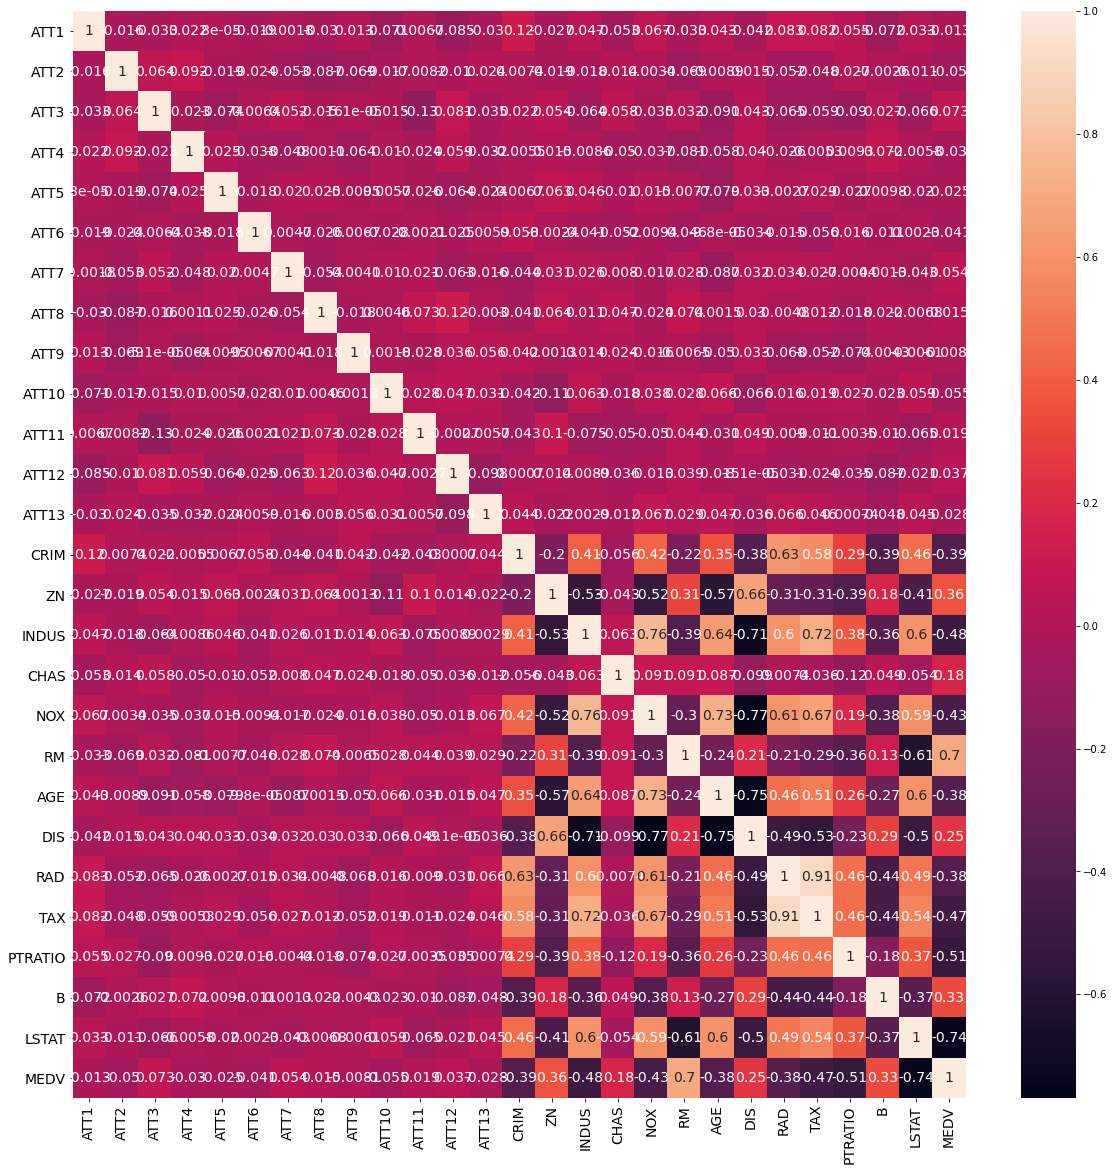

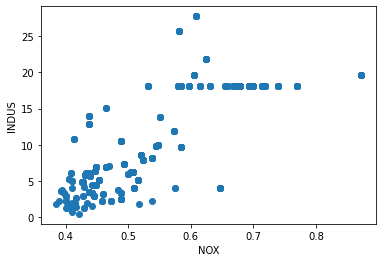

In [19]:
plt.scatter(df['NOX'],df['INDUS'])
plt.xlabel("NOX")
plt.ylabel('INDUS')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
df = pd.read_csv('housing2.csv')
X =df.drop(columns = ['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.6368627208821083
Root Mean Squared Error: 5.160448670829035


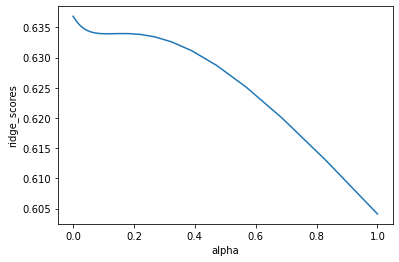

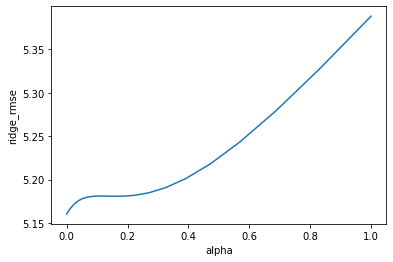

In [54]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge_rmse = []




for x in alpha_space:
    ridge = Ridge(alpha =x, normalize = True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_scores.append(np.mean(ridge.score(X_test,y_test)))
    ridge_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))

plt.plot(alpha_space, ridge_scores)
plt.xlabel('alpha')
plt.ylabel('ridge_scores')
plt.figure(2)
plt.plot(alpha_space, ridge_rmse)
plt.xlabel('alpha')
plt.ylabel('ridge_rmse')
plt.show()

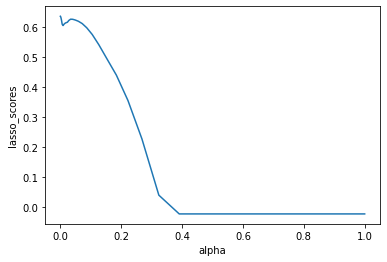

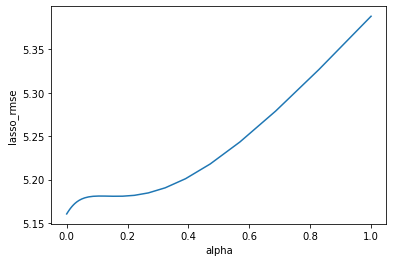

In [55]:
from sklearn.linear_model import Lasso

alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []
lasso_rmse = []




for x in alpha_space:
    lasso = Lasso(alpha =x, normalize = True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_scores.append(np.mean(lasso.score(X_test,y_test)))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))

plt.plot(alpha_space, lasso_scores)
plt.xlabel('alpha')
plt.ylabel('lasso_scores')
plt.figure(2)
plt.plot(alpha_space, ridge_rmse)
plt.xlabel('alpha')
plt.ylabel('lasso_rmse')
plt.show()

In EDA, we could see there are 26 columns. First 13 columns data have almost the same statitical infomation such as mean, std and so on.In heatmeap we see each of first 13 attributes is very uncorrelated with other attributes and last 13 attributes are relatively high-correlated to each other. So we could think that first 13 attributes are likely noise.
Using linear regression, performance metric R^2 is 0.6368627208821083, Root Mean Squared Error is 5.160448670829035. In rigde regression, it turns out when alpha is 0 the model performs well. In lasso regression, best alpha is between 0.05 and 0.07.